In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("scores_data.csv")
df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7
...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7


In [4]:
df.shape

(149, 3)

In [5]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [6]:
#removing space from columns names

df.columns=df.columns.str.strip()

In [7]:
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [8]:
#Data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [9]:
#Separation of obtained score and maximum score from Score column and converting to int datatype
df["Score_Value"] = df["Score"].str.split("/").str[0].astype(int)
df["Max_Score"] = df["Score"].str.split("/").str[1].astype(int)


In [10]:
df.head()

,Batch,User_ID,Score,Score_Value,Max_Score
0,AI_ELITE_7,uid_149,6 / 7,6,7
1,AI_ELITE_7,uid_148,6 / 7,6,7
2,AI_ELITE_7,uid_147,7 / 7,7,7
3,AI_ELITE_7,uid_146,7 / 7,7,7
4,AI_ELITE_7,uid_145,4 / 7,4,7


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2   Score        149 non-null    object
 3   Score_Value  149 non-null    int32 
 4   Max_Score    149 non-null    int32 
dtypes: int32(2), object(3)
memory usage: 4.8+ KB


In [12]:
#Checking for missing values
df.isnull().sum()

Batch          0
User_ID        0
Score          0
Score_Value    0
Max_Score      0
dtype: int64

In [13]:
# knowing unique values of batch column
print(df['Batch'].unique())

['AI_ELITE_7' 'AI_ELITE_6' 'AI_ELITE_4']


In [14]:
#Number of students in each batch
df.groupby("Batch")["Score_Value"].count()

Batch
AI_ELITE_4    48
AI_ELITE_6    48
AI_ELITE_7    53
Name: Score_Value, dtype: int64

In [15]:
#Average scores of each batch
df.groupby("Batch")["Score_Value"].mean()

Batch
AI_ELITE_4    3.791667
AI_ELITE_6    4.229167
AI_ELITE_7    5.056604
Name: Score_Value, dtype: float64

AI_ELITE_7 demonstrates superior average performance, followed by AI_ELITE_6 with moderate outcomes, while AI_ELITE_4 shows comparatively weaker performance, indicating the need for targeted interventions.

In [16]:
#Statistcal descxription of each batch
df.groupby("Batch")["Score_Value"].describe()

,count,mean,std,min,25%,50%,75%,max
Batch,,,,,,,,
AI_ELITE_4,48.0,3.791667,1.443376,0.0,3.0,4.0,4.25,7.0
AI_ELITE_6,48.0,4.229167,1.640441,0.0,3.0,4.0,5.00,7.0
AI_ELITE_7,53.0,5.056604,1.446682,2.0,4.0,5.0,6.00,7.0


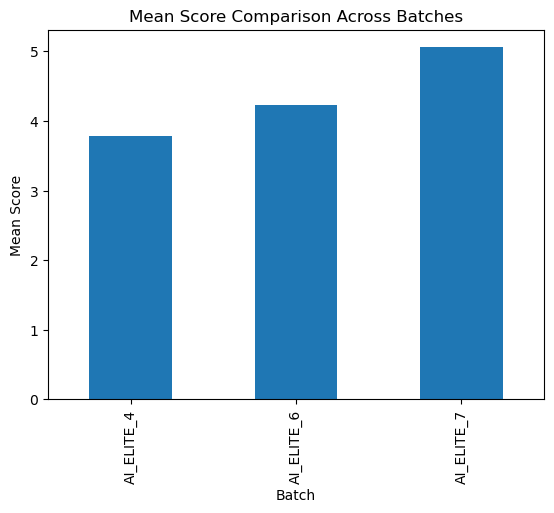

In [17]:
#Plot of means of batch for visual comparision
import matplotlib.pyplot as plt

means=df.groupby("Batch")["Score_Value"].mean()
means.plot(kind="bar")
plt.ylabel("Mean Score")
plt.title("Mean Score Comparison Across Batches")
plt.show()


In [18]:
batch_names = df["Batch"].unique()
print(batch_names)

['AI_ELITE_7' 'AI_ELITE_6' 'AI_ELITE_4']


In [19]:
score_data = [
    df[df["Batch"] == batch]["Score_Value"]
    for batch in batch_names
]

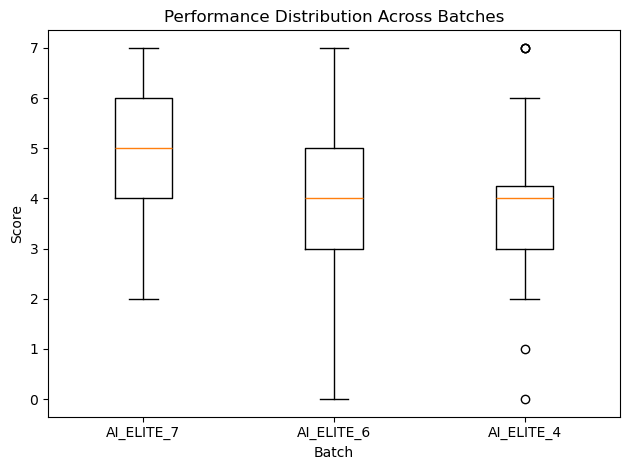

In [20]:
plt.figure()
plt.boxplot(score_data, tick_labels=batch_names)
plt.xlabel("Batch")
plt.ylabel("Score")
plt.title("Performance Distribution Across Batches")
plt.tight_layout()
plt.show()


In [21]:
performance_distribution = df.groupby("Batch").agg(
    High_Performers=("Score_Value", lambda x: (x >= 6).sum()),
    Moderate_Performers=("Score_Value", lambda x: ((x >= 4) & (x <= 5)).sum()),
    Low_Performers=("Score_Value", lambda x: (x <= 3).sum())
).reset_index()

print(performance_distribution)


        Batch  High_Performers  Moderate_Performers  Low_Performers
0  AI_ELITE_4                4                   27              17
1  AI_ELITE_6                9                   24              15
2  AI_ELITE_7               23                   21               9


In [27]:
comparison = df.groupby("Batch").agg(
        High_Performer_Count=("Score_Value", lambda x: (x >= 6).sum()),
    Total_Students=("Score_Value", "count")
    ).reset_index()

comparison["High_Performer_Percentage"] = (
    comparison["High_Performer_Count"] / comparison["Total_Students"] * 100
)


comparison = comparison[[
    "Batch",
    "High_Performer_Percentage",
    ]]

print(comparison)


        Batch  High_Performer_Percentage
0  AI_ELITE_4                   8.333333
1  AI_ELITE_6                  18.750000
2  AI_ELITE_7                  43.396226
